In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import special

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM

df = pd.read_csv('/Repos/Outliers_GPS/input/old/gps-6abca0f8-8939-44f5-ac26-739d4dd69216.txt')
del df['Unnamed: 0']
df

,Timestamp,Quality,Lat,Lon
0,1627980958672,2.5,47.639140,6.148163
1,1627980964469,14.5,47.636136,6.152410
2,1627980970488,5.0,47.636069,6.152629
3,1627980976462,2.5,47.636183,6.152918
4,1627980982470,1.5,47.636311,6.153307
...,...,...,...,...
595,1627984528424,3.0,47.583847,6.860338
596,1627984534426,3.0,47.583847,6.860338
597,1627984540425,3.0,47.583847,6.860338
598,1627984546476,3.0,47.583847,6.860338


C:\Users\Gaetan Rigaut\AppData\Local\Temp\ipykernel_22544\1063520689.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


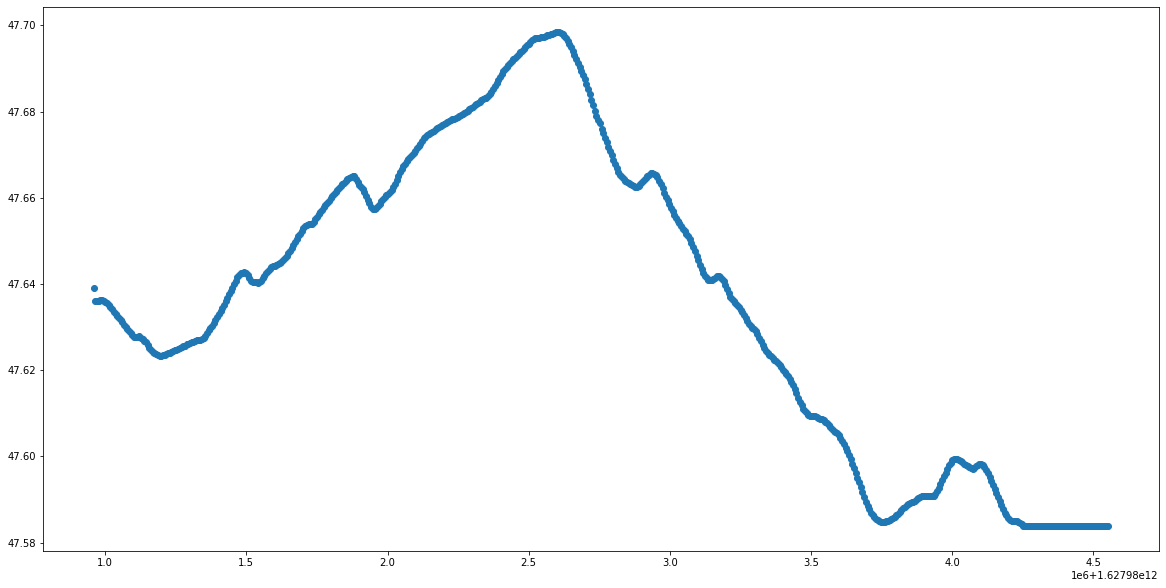

In [17]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=df['Timestamp'],
           y=df['Lat'])
fig.show()

C:\Users\Gaetan Rigaut\AppData\Local\Temp\ipykernel_22544\2191228119.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


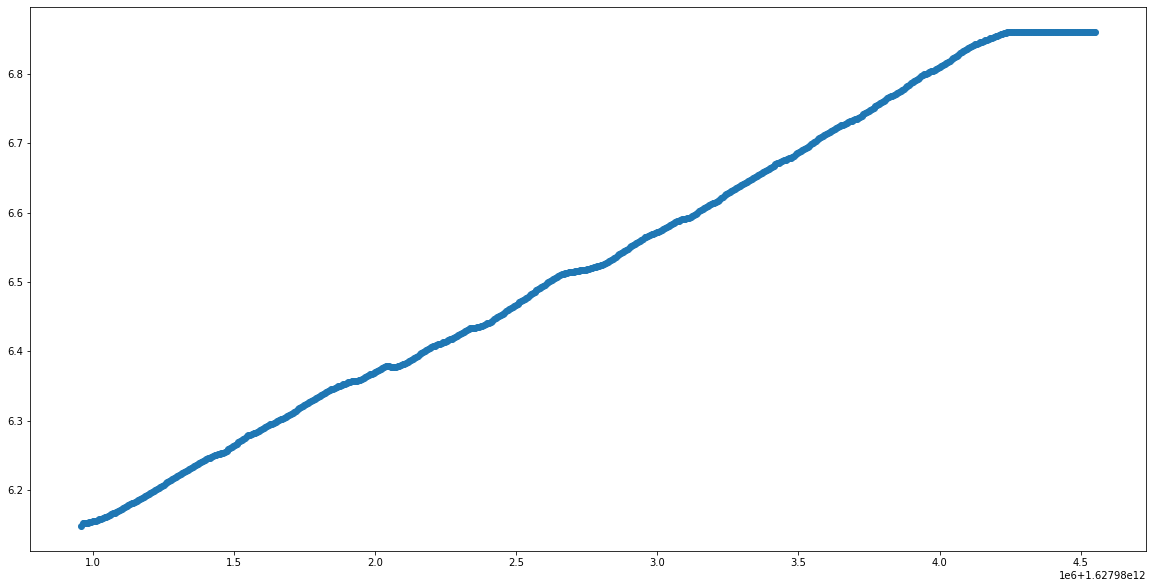

In [18]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=df['Timestamp'],
           y=df['Lon'])
fig.show()

Valeurs aberrantes /Outliers

Un outlier ou valeur aberrante correspond à une valeur éloignée de la distribution de la variable. Cela pourra être dû à une erreur de typographie ou à une erreur de mesure mais cela pourra également être une valeur extrême. On parle couramment de valeur extrême, pour désigner une valeur non erronée qui s’éloigne néanmoins fortement du reste des valeurs de la variable. 

Une façon assez simple de détecter ces valeurs est de réaliser un box-plot pour chacune des variables. Un box plot est un graphique sous forme de rectangle où sont décrites les statistiques de la variables (les quartiles (Q1, médiane, Q3). Les bornes du graphique délimitent les valeurs selon la distribution de la variable. Au-delà de ces extrémités, ces valeurs sont considérées comme des valeurs aberrantes.

In [2]:
#on importe la librairie seaborn sous le nom sns

import seaborn as sns 

c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Lat'>

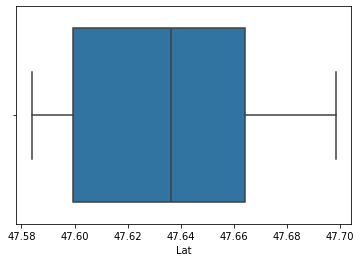

In [3]:
#On affiche le boxplot associé à la variable

sns.boxplot(df['Lat'])

c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Lon'>

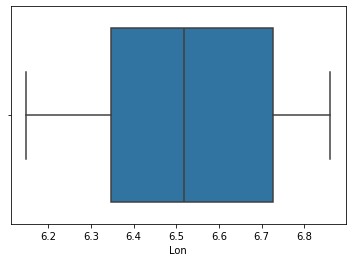

In [4]:
#On affiche le boxplot associé à la variable

sns.boxplot(df['Lon'])

c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


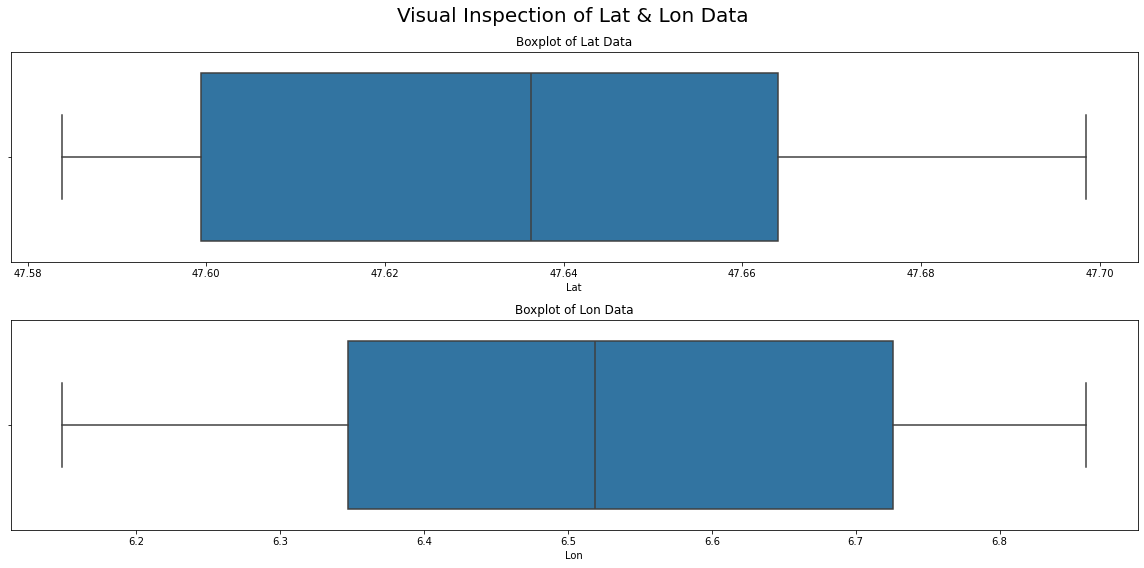

In [5]:
fig, axs = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Visual Inspection of Lat & Lon Data', size=20)
sns.boxplot(df['Lat'], orient='h', ax=axs[0])
axs[0].set(title='Boxplot of Lat Data')
sns.boxplot(df['Lon'], orient='h', ax=axs[1])
axs[1].set(title='Boxplot of Lon Data')
plt.tight_layout()
plt.show()

Inspection visuelle

Déjà lors de l'analyse exploratoire des données avec visualisations, vous pouvez effectuer un premier filtrage des données à l'aide de boxplots pour détecter les valeurs aberrantes. Pour les boxplots, les données sont classées de petite à grande pour évaluer la distribution. On peut alors voir combien de points de données se situent en dehors des moustaches, c'est-à-dire s'écartent de plus de 1,5 de l'écart interquartile (IQR) de la valeur moyenne. L'écart interquartile représenté par la boîte décrit la plage de 25 à 75 % de la distribution des données et les moustaches en haut et en bas les 25 % restants respectifs. Tout point de données en dehors des moustaches est alors une valeur aberrante. Cette méthodologie peut être utilisée comme base pour la méthode quantile suivante pour déterminer les seuils/quantiles correspondants et pour détecter les valeurs aberrantes à partir de ceux-ci.

c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


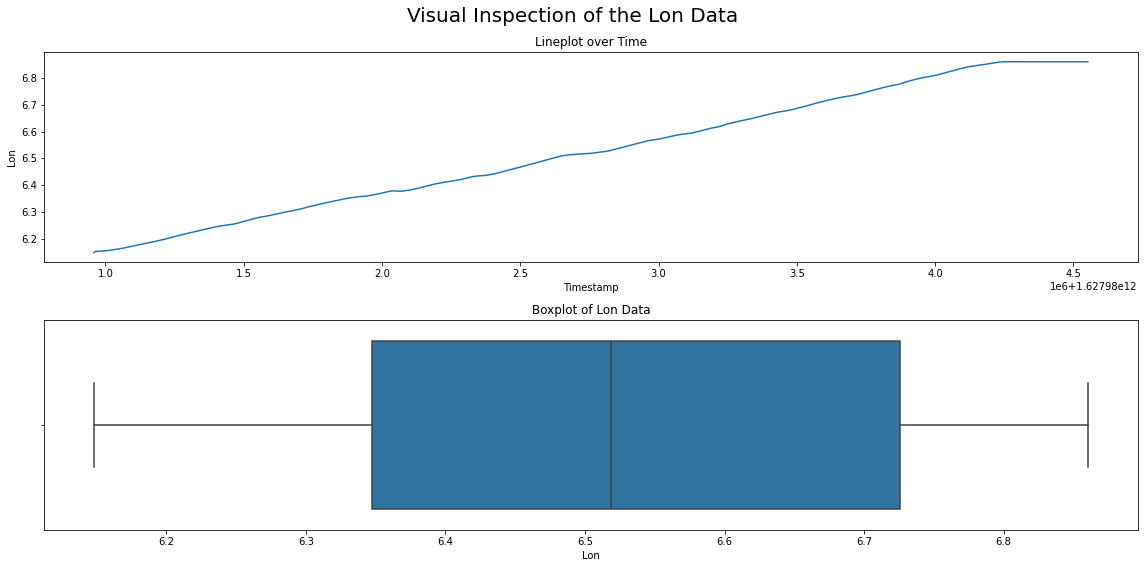

In [6]:
fig, axs = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Visual Inspection of the Lon Data', size=20)
sns.lineplot(data=df, x='Timestamp', y='Lon', ax=axs[0])
axs[0].set(title='Lineplot over Time')
sns.boxplot(df['Lon'], orient='h', ax=axs[1])
axs[1].set(title='Boxplot of Lon Data')
plt.tight_layout()
plt.show()

c:\Users\Gaetan Rigaut\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


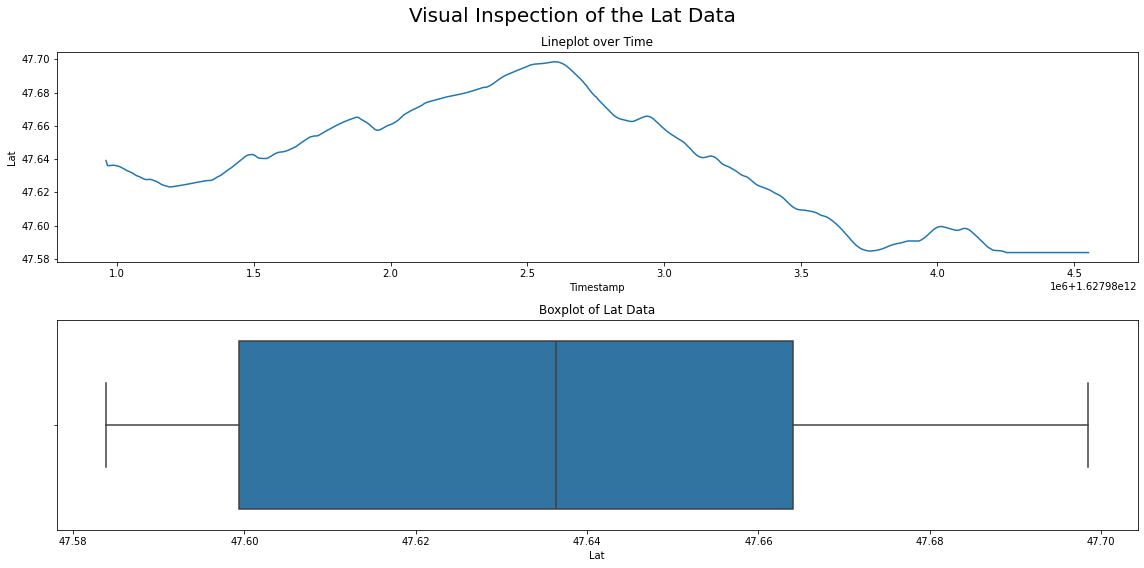

In [7]:
fig, axs = plt.subplots(2, figsize=(16, 8))
fig.suptitle('Visual Inspection of the Lat Data', size=20)
sns.lineplot(data=df, x='Timestamp', y='Lat', ax=axs[0])
axs[0].set(title='Lineplot over Time')
sns.boxplot(df['Lat'], orient='h', ax=axs[1])
axs[1].set(title='Boxplot of Lat Data')
plt.tight_layout()
plt.show()

Basé sur les quantiles

La détection des valeurs aberrantes basée sur les quantiles est une procédure assez simple dans laquelle les points situés en dehors d'un certain quantile sont considérés comme des valeurs aberrantes. Par exemple, pour les seuils 2 et 98 (comme dans le code suivant), toutes les valeurs situées en dehors de ces quantiles sont marquées comme des valeurs aberrantes. Cela signifie que les points de données situés en haut et en bas de la distribution sont considérés comme des valeurs aberrantes. Cependant, cette approche risque de marquer à tort des points comme des valeurs aberrantes, car elle ne prend pas en compte d'autres informations sur la distribution, comme l'écart type.

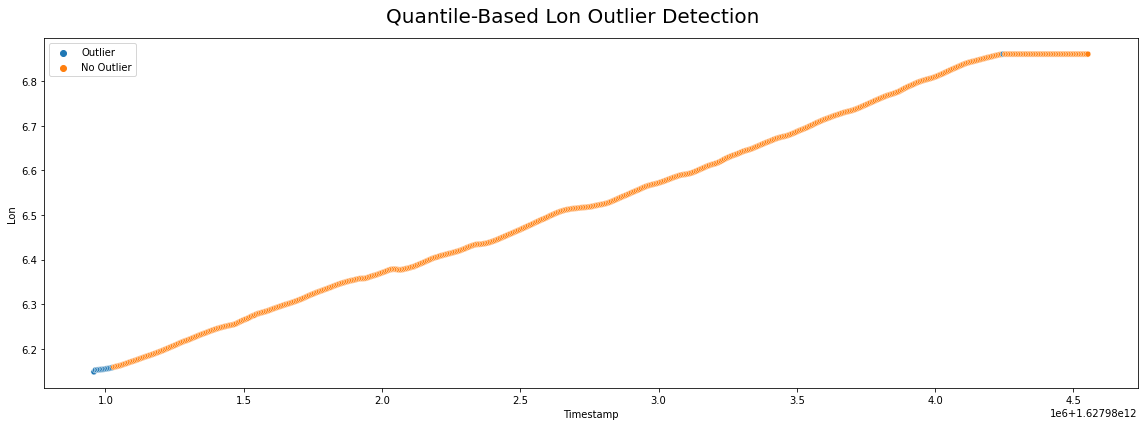

In [8]:
# Set the quantiles and get the respective values
from datetime import date


lower_q, upper_q = 0.02, 0.98## determine the quartile thresholds.
lower_value = df['Lon'].quantile(lower_q)## apply the lower threshold to dataset.
upper_value = df['Lon'].quantile(upper_q)## apply the upper threshold to dataset.

# Plot the results
mask = (lower_value <= df.Lon) & (df.Lon <= upper_value)## create mask that differentiates between outlier and no outlier.
fig, ax = plt.subplots(figsize=(16, 6))## create a plot
fig.suptitle('Quantile-Based Lon Outlier Detection', size=20) ## create title
sns.scatterplot(data=df, x='Timestamp', y='Lon', hue=np.where(mask, 'No Outlier', 'Outlier'), ax=ax) ## apply color to outlier/no outlier
plt.tight_layout() ##makes sure that all variables and axes are readable
plt.show()

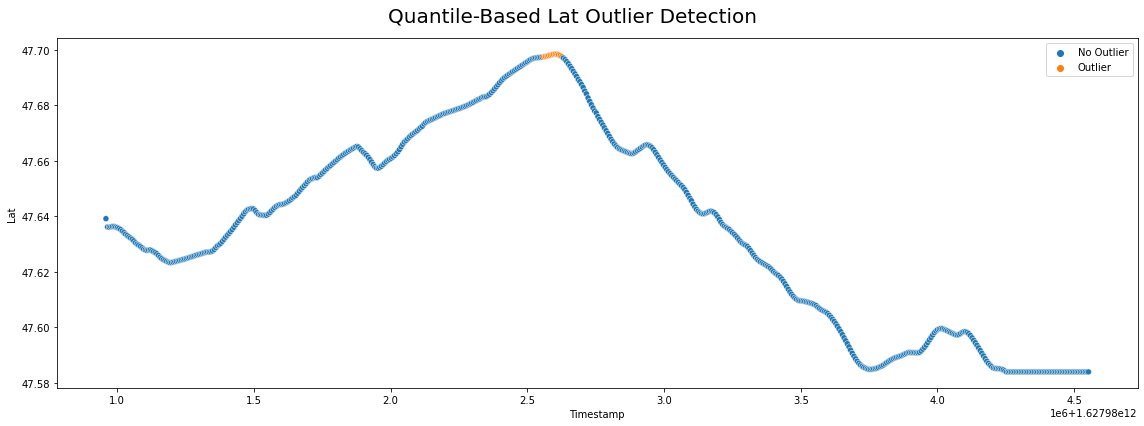

In [9]:
# Set the quantiles and get the respective values
from datetime import date


lower_q, upper_q = 0.02, 0.98## determine the quartile thresholds.
lower_value = df['Lat'].quantile(lower_q)## apply the lower threshold to dataset.
upper_value = df['Lat'].quantile(upper_q)## apply the upper threshold to dataset.

# Plot the results
mask = (lower_value <= df.Lat) & (df.Lat <= upper_value)## create mask that differentiates between outlier and no outlier.
fig, ax = plt.subplots(figsize=(16, 6))## create a plot
fig.suptitle('Quantile-Based Lat Outlier Detection', size=20) ## create title
sns.scatterplot(data=df, x='Timestamp', y='Lat', hue=np.where(mask, 'No Outlier', 'Outlier'), ax=ax) ## apply color to outlier/no outlier
plt.tight_layout() ##makes sure that all variables and axes are readable
plt.show()

Basé sur la distribution

Dans la détection des valeurs aberrantes basée sur la distribution, on part du principe que les données d'une mesure sont normalement distribuées. Sur la base de la moyenne et de l'écart type des données, une probabilité résulte pour chaque point de l'enregistrement qui appartient à cette distribution normale. En utilisant le critère dit de Chauvenet, une limite inférieure peut être définie en dessous de laquelle un point est marqué comme valeur aberrante. Si le critère de Chauvenet est fixé à 0,5, tous les points qui appartiennent à la distribution normale des données avec une probabilité inférieure à 0,5 % sont reconnus comme valeurs aberrantes. En fonction de la valeur élevée du critère, le nombre de valeurs aberrantes détectées change en conséquence (ceci est illustré dans la figure 3). La valeur de la limite optimale, c'est-à-dire la valeur à laquelle le critère de Chauvenet doit être fixé, dépend de l'objectif ultérieur et n'est souvent déterminée qu'au fil du temps. Cette approche est étroitement liée au score Z, qui est une mesure de l'écart d'un point par rapport à la moyenne d'une distribution normale standardisée. Le critère de Chauvenet peut être appliqué aux données univariées et multivariées, offrant la possibilité d'appliquer la détection de valeurs aberrantes soit à des attributs uniques, soit à une combinaison d'attributs.

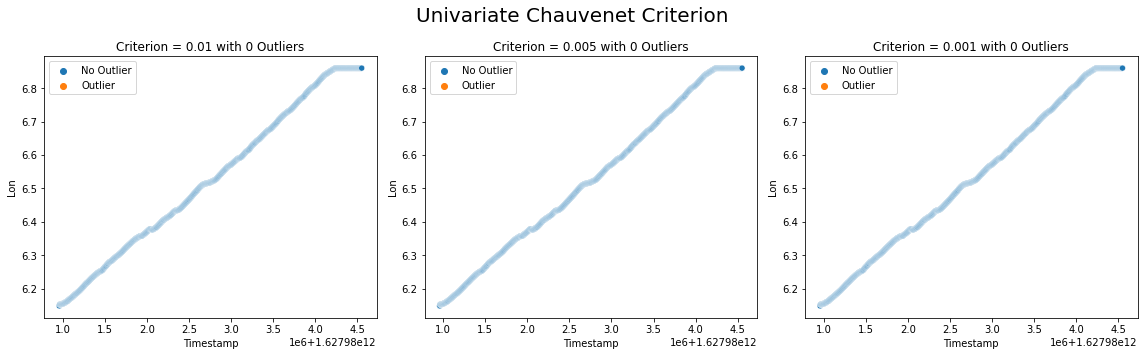

In [10]:
# LON DATA
# Set the quantiles and get the respective values
lower_q, upper_q = 0.02, 0.98## determine the qyartule thresholds.
lower_value = df['Lon'].quantile(lower_q)## apply the lower threshold to dataset.
upper_value = df['Lon'].quantile(upper_q)## apply the upper threshold to dataset.

# Plot the results
def univariate_chauvenet(data_points: np.ndarray, criterion: float = None):
    # Calculate mean and std of the data
    mean = data_points.mean()
    std = data_points.std()

    # Calculate the criterion based on the number of points if not provided
    if criterion is None:
        criterion = 1.0/(2 * len(data_points)) ## criterion is set to 1 divided 2 times the length of the data set.

    # Calculate the absolute deviation and scale by std
    deviation = np.abs(data_points - mean) / std

    # Calculate the probabilities using erfc and return the mask. Erfc is the error function calculating the probability of a data point (not) being an outlier.
    # if the probability is lower than the criterion (so the likelihood that the data point is no outlier is smaller than the set criterion), it is an outlier.
    probabilities = special.erfc(deviation) # type: ignore
    return probabilities < criterion


fig, axs = plt.subplots(ncols=3, figsize=(16, 5))##create plot with three sub-plots
fig.suptitle('Univariate Chauvenet Criterion', size=20)
for i, c in enumerate([0.01, 0.005, 0.001]): ## creating a for loop to check for outliers for different criteria.
    mask = univariate_chauvenet(data_points=df['Lon'].values, criterion=c)## create mask as above
    sns.scatterplot(data=df, x='Timestamp', y='Lon', ax=axs[i],
                    hue=np.where(mask, 'Outlier', 'No Outlier'),
                    hue_order=['No Outlier', 'Outlier']) ##create scatter plots colored according to the mask.
    axs[i].set(title=f'Criterion = {c} with {sum(mask)} Outliers')
plt.tight_layout()
plt.show()

Open Street Map (OSM) et CCRS

Déterminer les max et min des colonnes Lat et Lon afin d'adapter le fond de carte suivant

In [11]:
delta=0.05

In [12]:
print("lat max : ",max(df["Lat"])," lat min : ", min(df["Lat"]))
print("lon max : ",max(df["Lon"])," lon min : ", min(df["Lon"]))

max_lat=max(df["Lat"])+delta
max_lon=max(df["Lon"])+delta
min_lat=min(df["Lat"])-delta
min_lon=min(df["Lon"])-delta

lat max :  47.69851169083268  lat min :  47.58384679444135
lon max :  6.860372917726637  lon min :  6.1481627728790045


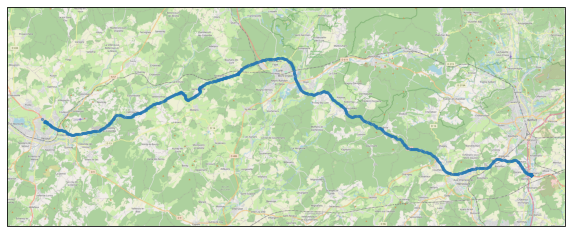

In [13]:
# on utilise Open Street Map (OSM)
osm_tiles = OSM()
# on crée une figure
plt.figure(figsize=(10,10))
# on crée notre fond de carte en adaptant aux coordonnées du df de données récupérées
ax = plt.axes(projection=osm_tiles.crs)
ax.set_extent([min_lon, max_lon, min_lat, max_lat],
ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)
# on ajoute un nuage de points avec les données de trajet
ax.scatter("Lon","Lat", data=df, s=5, 
           transform=ccrs.PlateCarree(), alpha=.5)

<Axes: title={'center': 'Evolution des points de Longitude'}, xlabel='Timestamp'>

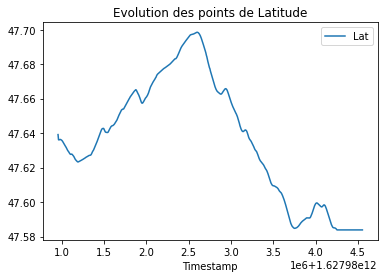

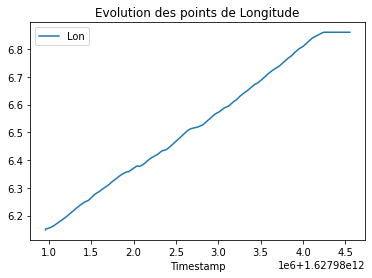

In [14]:
df.plot(x="Timestamp", y="Lat", 
           title="Evolution des points de Latitude",
           legend=True)
df.plot(x="Timestamp", y="Lon", 
           title="Evolution des points de Longitude",
           legend=True)

In [15]:
x=df["Lat"]
y=df["Lon"]
taille = 4
couleurs=600

C:\Users\Gaetan Rigaut\AppData\Local\Temp\ipykernel_22544\1088770750.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,s=taille, cmap=plt.get_cmap("Greys"))


Text(0.5, 1.0, 'Représentation des points Lon en fonction de Lat')

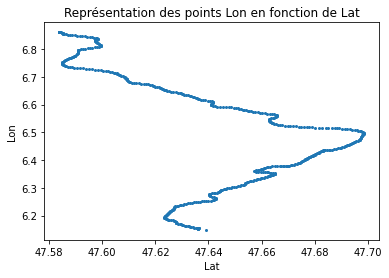

In [16]:
# s représente la taille des points
# c représente les couleurs (on peut avoir une seule couleur)
# cmap permet de fournir à Matplotlib une palette de couleurs
plt.scatter(x,y,s=taille, cmap=plt.get_cmap("Greys"))
plt.xlabel("Lat")
plt.ylabel("Lon")
plt.title("Représentation des points Lon en fonction de Lat")
#plt.colorbar()